## A Mental Model for Julia

Julia, while being "a scripting language", it is far more complex than other scripting languages. The goal for these slides is to give a proper mental model for approaching Julia

## Main Reasons to Use Julia

- You want to write code which is "slick" and readable
  - Code is read more than code is written!
- You want that same code to be fast
- You prefer to write everything in one language
- You are a developer: you want to write packages really fast which are really fast!
- You are a package user: you heard about some really cool Julia packages/metapackages (JuMP, Plots, DifferentialEquations), and want to use Julia
- Calling C, Fortran, Python, R, and MATLAB libraries, likely a combination of them, is necessary for your work
- You want built-in and easy native parallelism
- You want to build your own Domain-Specific Language (DSL), compiler, etc.

![Interop](https://github.com/UCIDataScienceInitiative/IntroToJulia/raw/master/assets/Julia_Interop_Test.jpg-large)

## Syntax is Familiar

Higham: An Algorithmic Introduction to Numerical Simulation of Stochastic Differential Equations

In [ ]:
%BPATH1 Brownian path simulation
function [t,W]=BPATH1(T,N)
randn('state',100)
dt = T/N;
dW = zeros(10,N);
W = zeros(10,N);

dW(:,1) = sqrt(dt)*randn(1,10);
W(:,1) = dW(:,1);

for j = 2:N
    dW(:,j) = sqrt(dt)*randn(1,10);
    W(:,j) = W(:,j-1) + dW(:,j);
end
t = [0:dt:T-dt];
end

% In Another File...

f = @() BPATH1(1,10000);
timeit(f,2)
[t,W] = BPATH1(1,10000);
plot(t,W,'r-')
xlabel('t','FontSize',16)
ylabel('W(t)','FontSize',16,'Rotation',0)

  0.312249 seconds (1.58 M allocations: 123.550 MB, 5.14% gc time)
  0.051225 seconds (1.30 M allocations: 111.374 MB, 16.63% gc time)



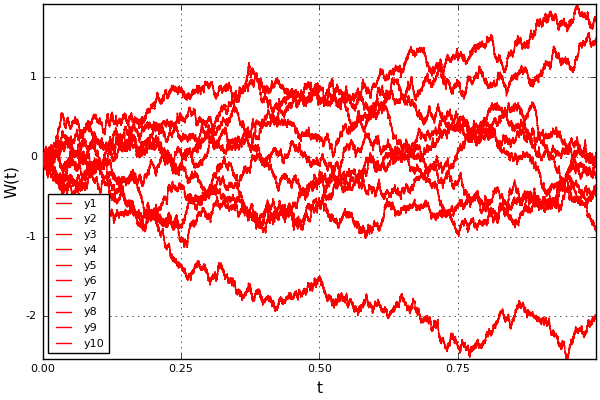

In [1]:
function bpath(T,N)
    srand(100)
    dt = T/N
    dW = zeros(10,N)
    W = zeros(10,N)

    dW[:,1] = sqrt(dt)*randn(10)
    W[:,1] = dW[:,1]

    for j = 2:N
        dW[:,j] .= sqrt(dt)*randn(10)
        W[:,j] .= W[:,j-1] .+ dW[:,j]
    end
    [0:dt:T-dt],W
end # Translation took < 1 minute
@time t,W = bpath(1,100000) # Timing is slower in Jupyter!
@time t,W = bpath(1,100000) # Timing is slower in Jupyter!
# 10x speedup over MATLAB
using Plots
plot(t,W',color=:red,xlabel="t",ylabel="W(t)")

##  [MATLAB, Python, Julia Syntax Comparison](http://cheatsheets.quantecon.org/)

## Main Reasons to Not Use Julia

- You need low latency (game programming)
- You need stability. i.e. you are a company and need a large code-base to run without modifications next year
- It is more complex than other scripting languages: there is a lot you can know

## The Julia Community: Who is a user?

- Julia, being high performance and equipped with heavy "CS" features, all while a scripting language, has attracted a diverse audience.
- A large group of Julia users are ex-MATLAB users interested in using Julia for faster numerical linear algebra applications.
- Another significant group are the machine learning and statistics users from R/Python looking to solve the "two-language" problem.
- Another group (a lot of Base contributors) are C/Fortran developers who are looking to increase productivity without sacrificing speed.
- Another group are "general-purpose" users: using Julia to develop faster web frameworks, compilers, and anyting else you can think of! 
- Another group is from functional programming languages (Haskell) and Lisps (Clojure, Femtolisp) interested in Julia's metaprogramming and parallelism.

Julia combines the interests, features, and libraries of all of these groups. To which group(s) do you belong?

We want a language that’s open source, with a liberal license. We want the speed of C with the dynamism of Ruby. We want a language that’s homoiconic, with true macros like Lisp, but with obvious, familiar mathematical notation like Matlab. We want something as usable for general programming as Python, as easy for statistics as R, as natural for string processing as Perl, as powerful for linear algebra as Matlab, as good at gluing programs together as the shell. Something that is dirt simple to learn, yet keeps the most serious hackers happy. We want it interactive and we want it compiled.

(Did we mention it should be as fast as C?)

While we’re being demanding, we want something that provides the distributed power of Hadoop — without the kilobytes of boilerplate Java and XML; without being forced to sift through gigabytes of log files on hundreds of machines to find our bugs. We want the power without the layers of impenetrable complexity. We want to write simple scalar loops that compile down to tight machine code using just the registers on a single CPU. We want to write A*B and launch a thousand computations on a thousand machines, calculating a vast matrix product together.

## Who Julia is Developed For

- The Julia project has one of the largest numbers of contributors of any open-source language.
  - There have been 500+ contributors, with 100+ having made more than 10 commits.
- Julia is created by people spanning these groups.
- Julia is made to have innovative design, but not syntax.

Julia's syntax is pulled from places considered "best-in-class":

- The statistics looks like R.
- The linear algebra looks like MATLAB.
- The general-purpose parts look like Python.
- The macros work like Lisp (they can look like it using LispSyntax.jl!).
- The fast devectorized code acts like C/Fortran.
- Built-in support for piping and first-class functions lets some people program Julia functionally.

No matter who you are, some of the terminology will be familiar, while other parts will be pulled from a domain you may have never heard of.


## A Mental Model for Python/R/MATLAB: Talking to a Politician

- These scripting languages were developed to "be easy".
- You tell them something, and they try to give you want you want.
- There may be some things hidden behind the scenes to make everything "work better".
- They may not give you the fastest reply.


## A Mental Model for C/Fortran: Talking to a Philosopher

- You say something, and they want something more specific.
- You spend hours digging deep into the specifics of something. 
- After finally getting it right, you know how to quickly get a specific answer from them.
- Everytime you want to talk about something new, you have to start all the way at the basics again.

## A Mental Model for Julia: Talking to a Scientist

- When you're talking, everything looks general. However, you really mean very specific details determined by context.
- You can quickly dig deep into a subject, assuming many rules, theories, and terminology.
- Nothing is hidden: if you ever want to hear about every little detail, you can ask.
- They will get mad (and throw errors at you) if you begin to be loose with the specific details.

Conclusion: While Julia looks at the surface like R/Python/MATLAB, what's actually happening under the hood is very different. It is this design difference which is essential to getting the full performance out of Julia while not sacrificing readability. The goal of the workshop is to show you how this works, and how to make it work to your advantage.

## The Rabbit Hole and Misconceptions

Since Julia has so many different influences meshed together, there is a "rabbit hole" of features to explore, designs to investigate, and performance tricks to exploit. We will be peaking into the rabbit hole. Here's a good snippet of a podcast that addresses some misconceptions.

http://www.rce-cast.com/

Karpinski: The syntax is superficially similar to MATLAB, so you can often translate MATLAB
code to Julia just by changing a few parenthesis to square brackets for indexing
into arrays and not really changing too much else. But the symantics are closest
probably to Python: it's [a] very straightforward dynamic language to write use.
But then there's sort of this rabbit hole of advanced features that you can go
down that you don't need to know about right away to write useful programs, but
which can help you as you find yourself doing harder and harder things.

Edelman: What happens when you start to go down this rabbit hole is you become
programmer, something for when you used these other languages you never knew you
were missing, and never knew you wanted to be. But then when you do it, you wonder
how you lived without it.

Listen to 5:50 - 17:00